#PyTorch Workflow

Let's explore a an examplr by Pytorch end-to-end encryption

In [31]:
import torch
from torch import nn #nn contains all of pytorch building blocks
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

#Data

Data can be almost anything ... in machine learning

#Linear regression (y = mx + b)

In [32]:
#Create *known* parameters

weight = 0.7
bias = 0.3

#Create some data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
Y= weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test sets

One of the most important cconcepts in machine learning in general

In [33]:
#Create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], Y[:train_split]
X_test, y_test = X[train_split:], Y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

###Vizualizing our data

In [34]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s = 4, label= "Training data")
  plt.scatter(test_data, test_labels, c="g", s = 4, label = "Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c = "r", s=4, label="Prediction data")

  plt.legend(prop={"size" : 14});

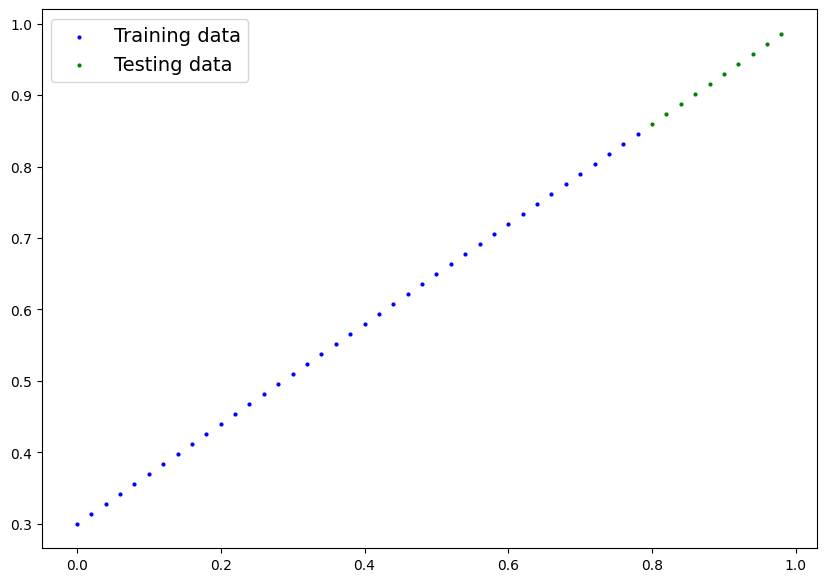

In [35]:
plot_predictions();

## Build a model
First PyTorch model

In [36]:
from torch import nn
class LinearRegressionModel(nn.Module): # <- Almost everything in PyTorch inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad= True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad= True,
                                         dtype = torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

### PyTorch Module Building essentials
* torch.nn: Building blocks
* torch.nn.paramters(): what parameter should our model try and Learn
* module
* torch.optim : This where the optimizers in PyTorch live
* def forward: this method defines what happens in forward computation

### Checking the contents of our PyTorch Model
check parameters - `.parameters()`

In [37]:
# Create a random seed
torch.manual_seed(42)

#Create an instance of model
model_0 = LinearRegressionModel()

#Check out parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [38]:
#List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [39]:
weight, bias

(0.7, 0.3)

In [40]:
with torch.inference_mode():
  y_preds = model_0(X_test)

#Can also do something similar with torch.no_grad()

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

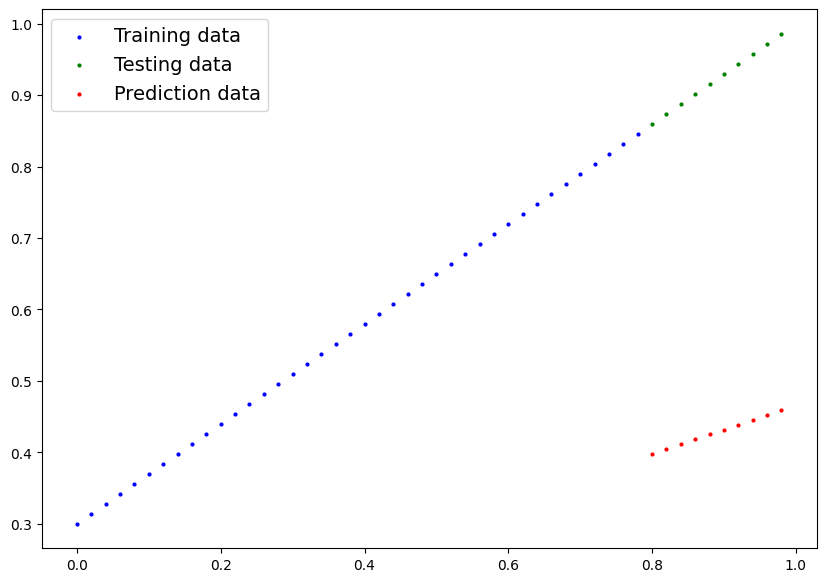

In [41]:
plot_predictions(predictions=y_preds)

### The whole idea of training is to move from some random parameters to required paramters

loss function


optimizer


In [42]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [43]:
#Setup a loss function
loss_fn = nn.L1Loss()

#Setup an optimizer(stochastic gradient descent)
optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr = 0.01) #lr = learning rate

#Building a training and testing loop:


In [44]:
torch.manual_seed(42)
epochs = 300

epoch_count = []
loss_count = []
test_loss_values = []

for epoch in range(epochs):
  #Set the model to training mode
  model_0.train()
  #1.
  y_preds = model_0(X_train)
  #2.
  loss = loss_fn(y_preds, y_train)
  print(f"Loss: {loss}")
  #3.
  optimizer.zero_grad()
  #4.
  loss.backward()
  #5.
  optimizer.step()
  #Testing
  model_0.eval()

  with torch.inference_mode():
    test_pred  = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    test_loss_values.append(test_loss)
    loss_count.append(loss)
    print(f"Epoch: {epoch}| loss: {loss}| test loss : {test_loss}")

    print(model_0.state_dict())

Loss: 0.31288138031959534
Epoch: 0| loss: 0.31288138031959534| test loss : 0.48106518387794495
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10| loss: 0.1976713240146637| test loss : 0.3463551998138428
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20| loss: 0.08908725529909134| test loss : 0.21729660034179688
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss: 0.08227583020925522
Loss: 0.07638

In [45]:
 with torch.inference_mode():
  y_preds_new = model_0(X_test)

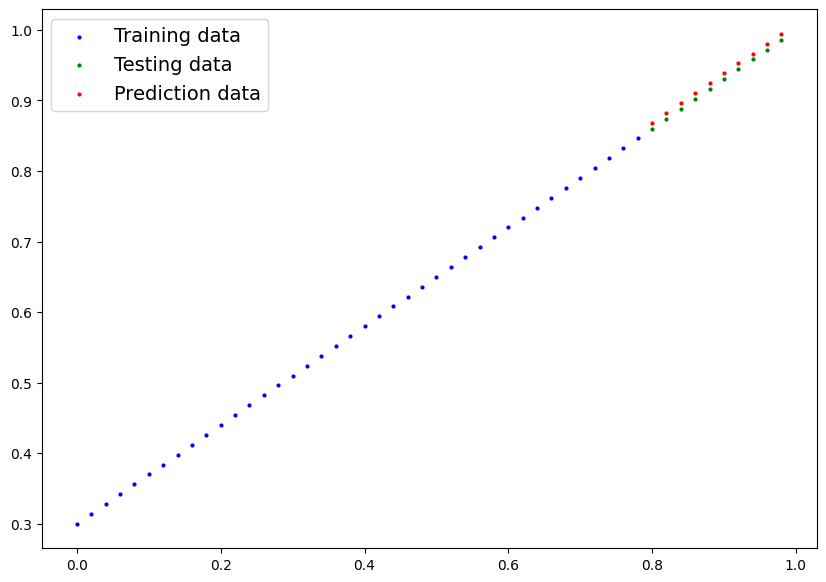

In [46]:
plot_predictions(predictions=y_preds_new)

In [47]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

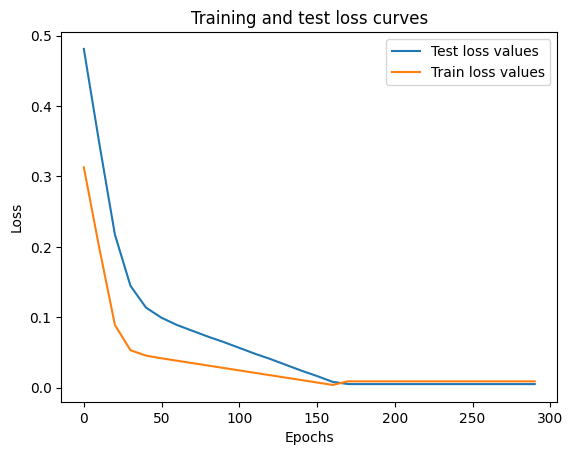

In [48]:
import numpy as np
#Plot the loss curves
plt.plot(epoch_count, test_loss_values, label = "Test loss values")
plt.plot(epoch_count, np.array(torch.tensor(loss_count)), label = "Train loss values")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

#Saving a model in PyTorch

There are three main methods for saving and loading

1.`torch.save` - saves object

2.`torch.load()` - saved PyTorch Object

3.`torch.nn.MOdule.load_state_dict()` - load's model's saved state dictionary

In [49]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [54]:
from pathlib import Path

#Create model directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

#Create a model save path
MODEL_NAME = "01model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#SAve the model state dict

print(f"Ssaving model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

Ssaving model to : Models/01model.pth


In [56]:
!ls -l Models

total 4
-rw-r--r-- 1 root root 1496 Jul 11 14:05 01model.pth


#loading a PyTorch model


In [57]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [58]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [59]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [61]:
#Make some predictions with loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [64]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])